In [1]:
import pandas as pd
import numpy as np
import math
import json
import csv

In [2]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)

In [6]:
informational_file = pd.read_csv (r'./modified data/informational_file.csv')

In [7]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [8]:
informational_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20741 entries, 0 to 20740
Data columns (total 32 columns):
customer_id        20741 non-null object
gender             20741 non-null object
income             20741 non-null float64
membership_days    20741 non-null object
offer_id           20741 non-null object
offer_type         20741 non-null object
offer_received     20741 non-null int64
offer_viewed       20741 non-null int64
offer_completed    20741 non-null int64
transaction        20741 non-null int64
amount             0 non-null float64
time               20741 non-null int64
duration           20741 non-null float64
difficulty         20741 non-null float64
channels           20741 non-null object
reward             20741 non-null float64
web                20741 non-null float64
social             20741 non-null float64
mobile             20741 non-null float64
email              20741 non-null float64
Age_group          20741 non-null object
Under 20           20741 non-n

In [9]:
#to identify which type of informational offer
def informational_type(offer_id,offer_type):
    for index, row in informational_file.iterrows():
        if row['offer_id'] == '3f207df678b143eea3cee63160fa8bed':
            informational_file.loc[index,'exact_offer'] = "informational_1"
                
        
        else :
            informational_file.loc[index,'exact_offer']="informational_2"

In [10]:
informational_type(informational_file['offer_id'], informational_file['offer_type'])

In [11]:
informational_file

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,46-60,Above 60,Male,Female,income_group,Under 30000,30000-60000,60000-90000,Above 90000,exact_offer
0,2eeac8d8feae4a8cad5a6af0499a211d,M,51000.0,1111 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1,0,1,0,30000-60000,0,1,0,0,informational_1
1,c27e0d6ab72c455a8bb66d980963de60,F,71000.0,1259 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,0,1,60000-90000,0,0,1,0,informational_1
2,be8a5d1981a2458d90b255ddc7e0d174,M,51000.0,2375 days 00:00:00.000000000,5a8bc65990b245e5a138643cd4eb9837,informational,1,0,0,0,...,0,0,1,0,30000-60000,0,1,0,0,informational_2
3,a5a6ef2b78a04ddc9f374dd7c7f60bff,M,52000.0,1824 days 00:00:00.000000000,5a8bc65990b245e5a138643cd4eb9837,informational,1,0,0,0,...,0,1,1,0,30000-60000,0,1,0,0,informational_2
4,6e04a90a0e074496b5f229eb1f553433,M,35000.0,1051 days 00:00:00.000000000,5a8bc65990b245e5a138643cd4eb9837,informational,1,0,0,0,...,0,0,1,0,30000-60000,0,1,0,0,informational_2
5,a2b7a0b3487a4d779ddf4e11a034e2ee,F,91000.0,952 days 00:00:00.000000000,5a8bc65990b245e5a138643cd4eb9837,informational,1,0,0,0,...,0,1,0,1,Above 90000,0,0,0,1,informational_2
6,2c5c63e5124e417b8504f76c868a4190,F,107000.0,1799 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,0,1,Above 90000,0,0,0,1,informational_1
7,1a353048b0884fc5a0afa27677ef1e80,F,56000.0,1201 days 00:00:00.000000000,5a8bc65990b245e5a138643cd4eb9837,informational,1,0,0,0,...,1,0,0,1,30000-60000,0,1,0,0,informational_2
8,6747dda08bed46298c23e05b64820a3a,M,57000.0,1397 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,1,0,30000-60000,0,1,0,0,informational_1
9,7c8479d8241344f6a0c306621e191c75,M,51000.0,2617 days 00:00:00.000000000,5a8bc65990b245e5a138643cd4eb9837,informational,1,0,0,0,...,1,0,1,0,30000-60000,0,1,0,0,informational_2


In [12]:
#split informational file into 4 different informational offer types
informational_type1 = informational_file[informational_file['exact_offer']=='informational_1'].copy()
informational_type2 = informational_file[informational_file['exact_offer']=='informational_2'].copy()

In [14]:
import csv
informational_type1.to_csv('./modified data/informational_type1.csv', index=False)
informational_type2.to_csv('./modified data/informational_type2.csv', index=False)

In [19]:
#informational_type1.info()

In [20]:
#informational_type2.info()

In [ ]:
#to categorise the customer on the bases of his resonse

In [21]:
def customer_informational1 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in informational_type1.iterrows():
        if row['exact_offer'] == 'informational_1':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_informational1")
                informational_type1.loc[index,'Category'] = "effective_informational1"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_informational1")
                informational_type1.loc[index,'Category'] = "interested_informational1"
                
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_informational1")
                informational_type1.loc[index,'Category'] = "interested_informational1"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_informational1")
                informational_type1.loc[index,'Category'] = "interested_informational1"
                
        
            else :
                #print ("ineffective_informational1")
                informational_type1.loc[index,'Category']="ineffective_informational1"
                

In [22]:
customer_informational1(informational_type1['exact_offer'],informational_type1['offer_received'],informational_type1['offer_viewed'],informational_type1['offer_completed'])     

In [23]:
def customer_informational2 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in informational_type2.iterrows():
        if row['exact_offer'] == 'informational_2':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_informational2")
                informational_type2.loc[index,'Category'] = "effective_informational2"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_informational2")
                informational_type2.loc[index,'Category'] = "interested_informational2"
                
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_informational2")
                informational_type2.loc[index,'Category'] = "interested_informational2"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_informational2")
                informational_type2.loc[index,'Category'] = "interested_informational2"
                
        
            else :
                #print ("ineffective_informational1")
                informational_type2.loc[index,'Category']="ineffective_informational2"

In [24]:
customer_informational2(informational_type2['exact_offer'],informational_type2['offer_received'],informational_type2['offer_viewed'],informational_type2['offer_completed'])     

In [29]:
#informational_type1

In [30]:
#informational_type1.info()

In [31]:
#informational_type2

In [32]:
#informational_type2.info()

In [33]:
#join the informational files
informational_alltypes = informational_type1.append([informational_type2])

In [34]:
informational_alltypes

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,Above 60,Male,Female,income_group,Under 30000,30000-60000,60000-90000,Above 90000,exact_offer,Category
0,2eeac8d8feae4a8cad5a6af0499a211d,M,51000.0,1111 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,0,30000-60000,0,1,0,0,informational_1,ineffective_informational1
1,c27e0d6ab72c455a8bb66d980963de60,F,71000.0,1259 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1,0,1,60000-90000,0,0,1,0,informational_1,ineffective_informational1
6,2c5c63e5124e417b8504f76c868a4190,F,107000.0,1799 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1,0,1,Above 90000,0,0,0,1,informational_1,ineffective_informational1
8,6747dda08bed46298c23e05b64820a3a,M,57000.0,1397 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1,1,0,30000-60000,0,1,0,0,informational_1,ineffective_informational1
10,37a97f6e09784a07bbb67bc6539f1a00,M,66000.0,1089 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,0,60000-90000,0,0,1,0,informational_1,ineffective_informational1
11,65f06566a2a14f64b003964f211635e1,M,68000.0,1857 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,0,60000-90000,0,0,1,0,informational_1,ineffective_informational1
13,0f54094029ca4107bfd36203aeb3ed14,M,50000.0,1186 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1,1,0,30000-60000,0,1,0,0,informational_1,ineffective_informational1
14,fd700397b7c8440baa70d5539926c5a0,F,77000.0,1070 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,1,0,1,60000-90000,0,0,1,0,informational_1,ineffective_informational1
15,3ecb372184104ff7bad0f0f60cb56e29,F,85000.0,1351 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,0,1,60000-90000,0,0,1,0,informational_1,ineffective_informational1
16,91dc71c4e9bd45b0861825c32f5ee8f9,M,62000.0,977 days 00:00:00.000000000,3f207df678b143eea3cee63160fa8bed,informational,1,0,0,0,...,0,1,0,60000-90000,0,0,1,0,informational_1,ineffective_informational1


In [35]:
informational_alltypes.to_csv('./modified data/informational_alltypes.csv',index=False)

In [36]:
informational_alltypes = pd.read_csv (r'./modified data/informational_alltypes.csv')

DATA VISUALISATION OF INFORMATIONAL OFFERS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
informational_alltypes = pd.read_csv (r'./modified data/informational_alltypes.csv')

In [3]:
plot_gender = informational_alltypes[informational_alltypes['gender'] != 'O']

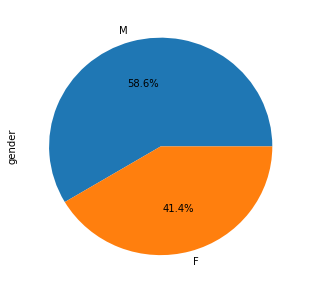

In [4]:
plot_gender.gender.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

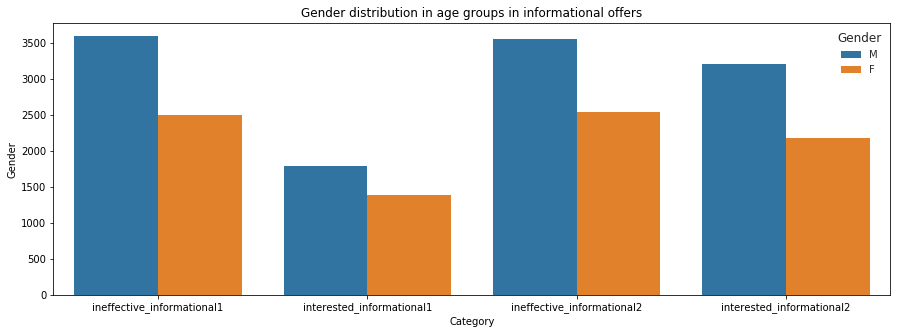

In [5]:
#Gender distribution in age groups in informational offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "Category", hue= "gender", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Gender distribution in age groups in informational offers')
plt.ylabel('Gender')
plt.xlabel('Category')
plt.legend(title='Gender')

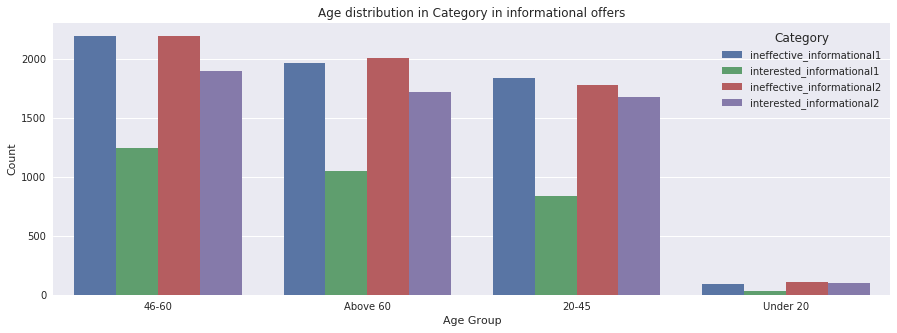

In [43]:
#Age distribution in Category in informational offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "Age_group", hue= "Category", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age distribution in Category in informational offers')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Category')

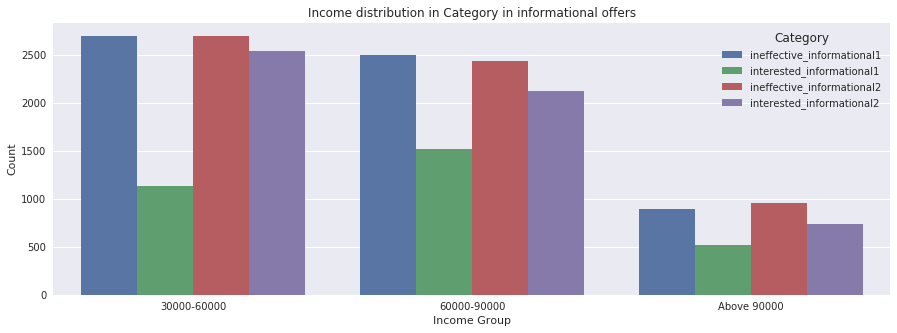

In [44]:
#Income distribution in Category in informational offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "income_group", hue= "Category", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Income distribution in Category in informational offers')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Category')

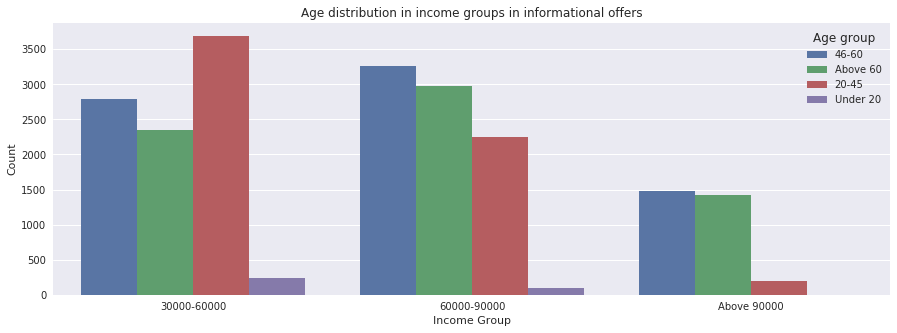

In [45]:
#'Age distribution in income groups in informational offers'
plt.figure(figsize=(15, 5))
sns.countplot(x= "income_group", hue= "Age_group", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age distribution in income groups in informational offers')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Age group')

In [46]:
def send_informational1(exact_offer,Category):
    for index, row in informational_alltypes.iterrows():
        if row['exact_offer'] == 'informational_1':
            if row['Category'] == 'effective_informational1' :
                informational_alltypes.loc[index,'send_informational1'] = 1
                
            elif row['Category'] == 'interested_informational1' :
                informational_alltypes.loc[index,'send_informational1'] = 1
               
            else :
                informational_alltypes.loc[index,'send_informational1'] = 0
                
        else :
            informational_alltypes.loc[index,'send_informational1'] = 0
            

In [48]:
send_informational1(informational_alltypes['exact_offer'],informational_alltypes['Category'])

In [49]:
def send_informational2(exact_offer,Category):
    for index, row in informational_alltypes.iterrows():
        if row['exact_offer'] == 'informational_2':
            if row['Category'] == 'effective_informational2' :
                informational_alltypes.loc[index,'send_informational2'] = 1
                
            elif row['Category'] == 'interested_informational2' :
                informational_alltypes.loc[index,'send_informational2'] = 1
               
            else :
                informational_alltypes.loc[index,'send_informational2'] = 0
                
        else :
            informational_alltypes.loc[index,'send_informational2'] = 0

In [50]:
send_informational2(informational_alltypes['exact_offer'],informational_alltypes['Category'])

In [52]:
#informational_alltypes

In [53]:
informational_send=informational_alltypes.copy()

In [54]:
informational_send.to_csv('./modified data/informational_send',index=False)

In [55]:
def offer_category(exact_offer):
    for index, row in informational_send.iterrows():
        if row['exact_offer'] == 'informational_1':
            informational_send.loc[index,'offer_category'] = 9

        else :
            informational_send.loc[index,'offer_category'] = 10

In [56]:
offer_category(informational_send['exact_offer'])

In [58]:
#informational_send

In [59]:
informational_category=informational_send.copy()

In [60]:
informational_category.to_csv('./modified data/informational_category.csv',index=False)

In [61]:
#informational_category = pd.read_csv (r'./modified data/informational_category.csv')

In [63]:
#informational_category.info()

In [64]:
informational_category=informational_category.drop('offer_received',axis=1)
informational_category=informational_category.drop('offer_completed',axis=1)
informational_category=informational_category.drop('offer_viewed',axis=1)

In [65]:
informational_category=informational_category.drop('transaction',axis=1)
informational_category=informational_category.drop('amount',axis=1)

In [66]:
informational_category=informational_category.drop('gender',axis=1)
informational_category=informational_category.drop('Age_group',axis=1)
informational_category=informational_category.drop('income',axis=1)
informational_category=informational_category.drop('income_group',axis=1)

In [67]:
informational_category=informational_category.drop('exact_offer',axis=1)
informational_category=informational_category.drop('duration',axis=1)
informational_category=informational_category.drop('difficulty',axis=1)
informational_category=informational_category.drop('reward',axis=1)
informational_category=informational_category.drop('channels',axis=1)

In [68]:
informational_category=informational_category.drop('offer_id',axis=1)
informational_category=informational_category.drop('offer_type',axis=1)

In [69]:
informational_category=informational_category.drop('time',axis=1)
informational_category=informational_category.drop('Category',axis=1)

In [70]:
informational_category=informational_category.drop('membership_days',axis=1)
#assume membership days donot influence the category
informational_category=informational_category.drop('customer_id',axis=1)

In [71]:
informational_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20741 entries, 0 to 20740
Data columns (total 17 columns):
web                    20741 non-null float64
social                 20741 non-null float64
mobile                 20741 non-null float64
email                  20741 non-null float64
Under 20               20741 non-null int64
20-45                  20741 non-null int64
46-60                  20741 non-null int64
Above 60               20741 non-null int64
Male                   20741 non-null int64
Female                 20741 non-null int64
Under 30000            20741 non-null int64
30000-60000            20741 non-null int64
60000-90000            20741 non-null int64
Above 90000            20741 non-null int64
send_informational1    20741 non-null float64
send_informational2    20741 non-null float64
offer_category         20741 non-null float64
dtypes: float64(7), int64(10)
memory usage: 2.7 MB


In [72]:
informational_final=informational_category.copy()

In [75]:
informational_final.to_csv('./modified data/informational_final.csv',index=False)

In [74]:
informational_final

,web,social,mobile,email,Under 20,20-45,46-60,Above 60,Male,Female,Under 30000,30000-60000,60000-90000,Above 90000,send_informational1,send_informational2,offer_category
0,1.0,0.0,1.0,1.0,0,0,1,0,1,0,0,1,0,0,0.0,0.0,9.0
1,1.0,0.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,9.0
2,1.0,0.0,1.0,1.0,0,0,0,1,0,1,0,0,0,1,0.0,0.0,9.0
3,1.0,0.0,1.0,1.0,0,0,0,1,1,0,0,1,0,0,0.0,0.0,9.0
4,1.0,0.0,1.0,1.0,0,0,1,0,1,0,0,0,1,0,0.0,0.0,9.0
5,1.0,0.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0,9.0
6,1.0,0.0,1.0,1.0,0,0,0,1,1,0,0,1,0,0,0.0,0.0,9.0
7,1.0,0.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,9.0
8,1.0,0.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0.0,0.0,9.0
9,1.0,0.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0,9.0


MODEL EVALUATION



In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB   
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
import pandas as pd
import numpy as np

In [2]:
import csv
informational_final = pd.read_csv (r'./modified data/informational_final.csv')


In [3]:
#spliting testing and training data
data = informational_final.drop(['offer_category'], axis=1)
label = informational_final['offer_category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 0)

In [5]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

DTC: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
LR: 1.000000 (0.000000)
GNB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


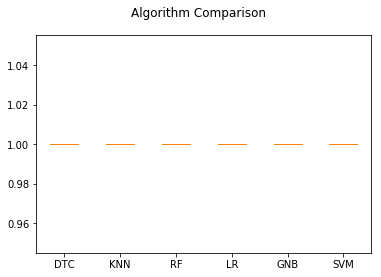

In [10]:
#model comparison
# load dataset

data = informational_final.drop(['offer_category'], axis=1)
label = informational_final['offer_category']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier ()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, data, label, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
y_pred = DTC.predict(X_test)

print(y_pred[:15])
print(y_test[:15])


[ 10.  10.   9.   9.  10.  10.   9.  10.  10.   9.  10.   9.  10.   9.  10.]
19898    10.0
17394    10.0
5167      9.0
1341      9.0
14874    10.0
10857    10.0
2108      9.0
13548    10.0
11583    10.0
18        9.0
12482    10.0
2330      9.0
19145    10.0
1569      9.0
10795    10.0
Name: offer_category, dtype: float64


In [8]:
X_test.head(15)

,web,social,mobile,email,Under 20,20-45,46-60,Above 60,Male,Female,Under 30000,30000-60000,60000-90000,Above 90000,send_informational1,send_informational2
19898,0.0,1.0,1.0,1.0,0,0,1,0,1,0,0,0,1,0,0.0,1.0
17394,0.0,1.0,1.0,1.0,0,0,0,1,1,0,0,0,1,0,0.0,0.0
5167,1.0,0.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0.0,0.0
1341,1.0,0.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,1.0,0.0
14874,0.0,1.0,1.0,1.0,0,0,0,1,1,0,0,0,1,0,0.0,1.0
10857,0.0,1.0,1.0,1.0,0,1,0,0,1,0,0,1,0,0,0.0,1.0
2108,1.0,0.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0.0,0.0
13548,0.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0
11583,0.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0,1,0,0.0,0.0
18,1.0,0.0,1.0,1.0,0,0,0,1,0,1,0,1,0,0,0.0,0.0


In [9]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

[[2790    0]
 [   0 3433]]


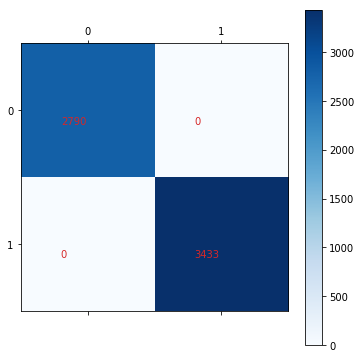

In [10]:
plot_confusion_matrix(y_test, DTC.predict(X_test))

•	In the case of INFORMATIONAL offers we have only 20000 data set and the model shows 100% accuracy. This may vary when we scale up the data.
•	So the recommended model algorithm for INFORMATIONAL offer is Decision Tree Classifier which is the benchmark model.


###############################################################################################################################